# EQUITY VANILLA OPTION USING MONTE CARLO PLUS TIMINGS

Valuation and Risk of a simple Vanilla Equity Option

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
from financepy.finutils import *
from financepy.products.equity import FinEquityVanillaOption
from financepy.market.curves.TuringDiscountCurveFlat import *
from financepy.models.FinModelBlackScholes import *

####################################################################
# FINANCEPY BETA Version 0.191 - This build:  17 Jan 2021 at 22:32 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



# Define the Call and Put Options

In [3]:
valueDate = TuringDate(1, 4, 2016)

In [4]:
expiryDate = TuringDate(1, 6, 2018)

In [5]:
expiryDate

01-JUN-2018

In [6]:
strikePrice = 100.0

In [7]:
callOption = FinEquityVanillaOption(expiryDate, strikePrice, TuringOptionTypes.EUROPEAN_CALL)

In [8]:
stockPrice = 100.0
volatility = 0.20
interestRate = 0.05
dividendYield = 0.03

In [9]:
discountCurve = TuringDiscountCurveFlat(valueDate, interestRate)

In [10]:
dividendCurve = TuringDiscountCurveFlat(valueDate, dividendYield)

In [11]:
model = FinModelBlackScholes(volatility)

In [12]:
v = callOption.value(valueDate, stockPrice, discountCurve, dividendCurve, model)
print(v)

12.83574234643392


In [13]:
v_exact = [v] * 10 

# Timing Analysis

In [14]:
seed = 141

In [15]:
numPathsList = np.arange(1,11,1) * 10000

## No Numpy Vectorisation and No NUMBA

In [16]:
v_mc_NO_NUMPY = []
timings_NO_NUMPY = []

for numPaths in numPathsList:
    start = time()
    v = callOption.valueMC_NONUMBA_NONUMPY(valueDate, stockPrice, discountCurve, 
                           dividendCurve, model, numPaths, seed, useSobol=False)
    end = time()
    elapsed = end - start
    timings_NO_NUMPY.append(elapsed)
    v_mc_NO_NUMPY.append(v)

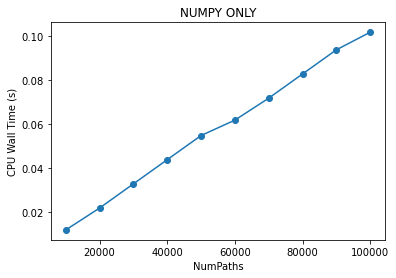

In [17]:
plt.plot(numPathsList, timings_NO_NUMPY, 'o-')
plt.xlabel("NumPaths")
plt.ylabel("CPU Wall Time (s)")
plt.title("NUMPY ONLY");

## Standard Monte Carlo using Numpy

In [18]:
numPathsList = np.arange(1,11,1) * 1000000

In [19]:
v_mc_NUMPY_ONLY = []
timings_NUMPY_ONLY = []

for numPaths in numPathsList:
    start = time()
    v = callOption. valueMC_NUMPY_ONLY(valueDate, stockPrice, discountCurve, 
                           dividendCurve, model, numPaths, seed, useSobol=False)
    end = time()
    elapsed = end - start
    timings_NUMPY_ONLY.append(elapsed)
    v_mc_NUMPY_ONLY.append(v)

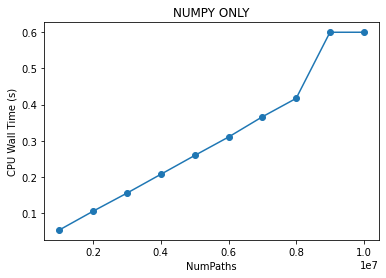

In [20]:
plt.plot(numPathsList, timings_NUMPY_ONLY, 'o-')
plt.xlabel("NumPaths")
plt.ylabel("CPU Wall Time (s)")
plt.title("NUMPY ONLY");

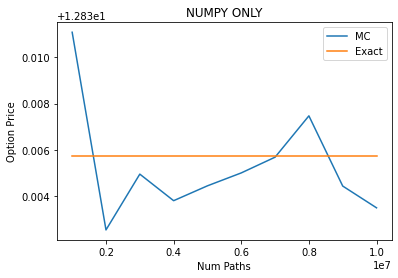

In [21]:
plt.title("NUMPY ONLY")
plt.plot(numPathsList, v_mc_NUMPY_ONLY, label="MC")
plt.plot(numPathsList, v_exact, label="Exact")
plt.xlabel("Num Paths")
plt.ylabel("Option Price")
plt.legend();

## Standard Monte Carlo using Numpy and Numba

In [22]:
v_mc_NUMPY_NUMBA = []
timings_NUMPY_NUMBA = []

for numPaths in numPathsList:
    start = time()
    v = callOption.valueMC_NUMBA_ONLY(valueDate, stockPrice, discountCurve, 
                           dividendCurve, model, numPaths, seed)
    end = time()
    elapsed = end - start
    timings_NUMPY_NUMBA.append(elapsed)
    v_mc_NUMPY_NUMBA.append(v)

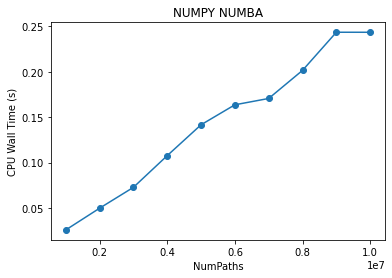

In [23]:
plt.plot(numPathsList, timings_NUMPY_NUMBA, 'o-')
plt.xlabel("NumPaths")
plt.ylabel("CPU Wall Time (s)")
plt.title("NUMPY NUMBA");

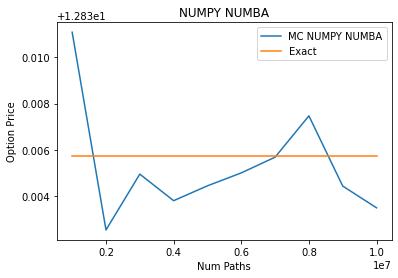

In [24]:
plt.title("NUMPY NUMBA")
plt.plot(numPathsList, v_mc_NUMPY_NUMBA, label="MC NUMPY NUMBA")
plt.plot(numPathsList, v_exact, label="Exact")
plt.xlabel("Num Paths")
plt.ylabel("Option Price")
plt.legend();

## Using Sobol Quasi-Random Numbers

In [25]:
v_mc_SOBOL_NUMPY = []
timings_SOBOL_NUMPY = []

for numPaths in numPathsList:
    start = time()
    v = callOption.valueMC(valueDate, stockPrice, discountCurve, 
                           dividendCurve, model, numPaths, seed, useSobol=True)
    end = time()
    elapsed = end - start
    timings_SOBOL_NUMPY.append(elapsed)
    v_mc_SOBOL_NUMPY.append(v)

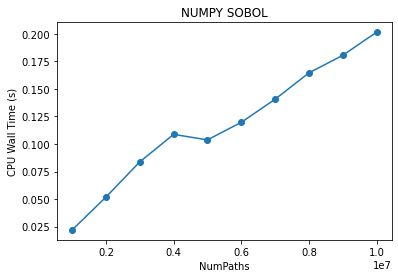

In [26]:
plt.plot(numPathsList, timings_SOBOL_NUMPY, 'o-')
plt.xlabel("NumPaths")
plt.ylabel("CPU Wall Time (s)")
plt.title("NUMPY SOBOL");

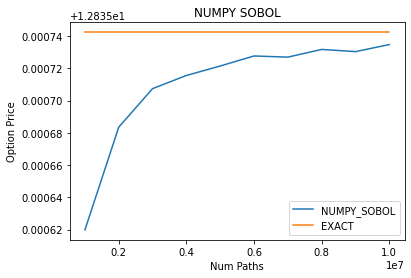

In [27]:
plt.title("NUMPY SOBOL")
plt.plot(numPathsList, v_mc_SOBOL_NUMPY, label="NUMPY_SOBOL")
plt.plot(numPathsList, v_exact, label="EXACT")

plt.xlabel("Num Paths")
plt.ylabel("Option Price")
plt.legend()

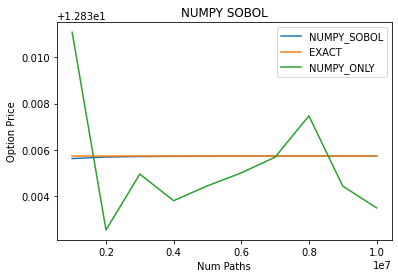

In [28]:
plt.title("NUMPY SOBOL")
plt.plot(numPathsList, v_mc_SOBOL_NUMPY, label="NUMPY_SOBOL")
plt.plot(numPathsList, v_exact, label="EXACT")
plt.plot(numPathsList, v_mc_NUMPY_ONLY, label="NUMPY_ONLY")

plt.xlabel("Num Paths")
plt.ylabel("Option Price")
plt.legend()

## Summary

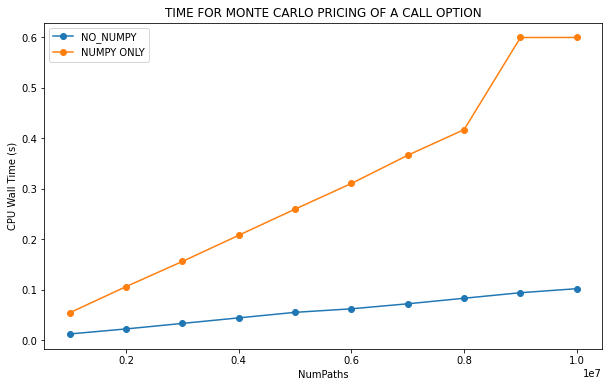

In [29]:
timings_CPP = [0.041, 0.11, 0.156, 0.203, 0.25, 0.309, 0.366, 0.398, 0.454, 0.484]
plt.figure(figsize=(10,6))
plt.plot(numPathsList, timings_NO_NUMPY, 'o-', label="NO_NUMPY")
plt.plot(numPathsList, timings_NUMPY_ONLY, 'o-', label="NUMPY ONLY")
plt.xlabel("NumPaths")
plt.ylabel("CPU Wall Time (s)")
plt.title("TIME FOR MONTE CARLO PRICING OF A CALL OPTION")
plt.legend()
#plt.yscale('log')

In [30]:
timings_NO_NUMPY

[0.011996269226074219,
 0.021941423416137695,
 0.032912254333496094,
 0.04389190673828125,
 0.054845571517944336,
 0.06183290481567383,
 0.071807861328125,
 0.0827789306640625,
 0.09375,
 0.10172915458679199]

In [31]:
timings_NUMPY_ONLY

[0.053858280181884766,
 0.10571670532226562,
 0.15558290481567383,
 0.20744538307189941,
 0.259310245513916,
 0.3101673126220703,
 0.3660273551940918,
 0.4168834686279297,
 0.5993678569793701,
 0.5994269847869873]

In [32]:
41.48/0.578

71.76470588235294

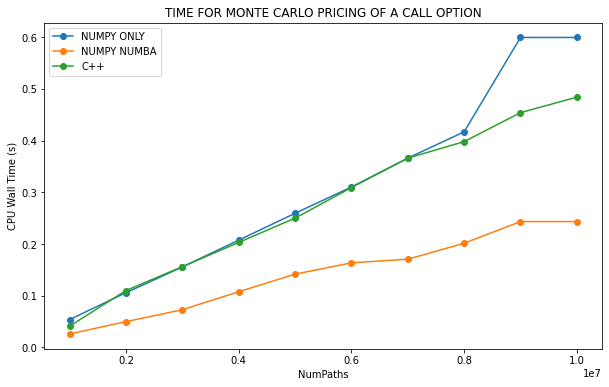

In [33]:
timings_CPP = [0.041, 0.11, 0.156, 0.203, 0.25, 0.309, 0.366, 0.398, 0.454, 0.484]
plt.figure(figsize=(10,6))
plt.plot(numPathsList, timings_NUMPY_ONLY, 'o-', label="NUMPY ONLY")
plt.plot(numPathsList, timings_NUMPY_NUMBA, 'o-', label="NUMPY NUMBA")
plt.plot(numPathsList, timings_CPP, 'o-', label="C++")
plt.xlabel("NumPaths")
plt.ylabel("CPU Wall Time (s)")
plt.title("TIME FOR MONTE CARLO PRICING OF A CALL OPTION")
plt.legend()
#plt.yscale('log')

The convergence is impressive !

Copyright (c) 2020 Dominic O'Kane